In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline

# Regression Analysis: Seasonal Effects with Sklearn Linear Regression
In this notebook, you will build a SKLearn linear regression model to predict Yen futures ("settle") returns with *lagged* Yen futures returns. 

In [2]:
# Futures contract on the Yen-dollar exchange rate:
# This is the continuous chain of the futures contracts that are 1 month to expiration
yen_futures = pd.read_csv(
    Path("yen.csv"), index_col="Date", infer_datetime_format=True, parse_dates=True
)
yen_futures.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
1976-08-02,3398.0,3401.0,3398.0,3401.0,NaN,3401.0,2.0,1.0
1976-08-03,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-04,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-05,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-06,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0


In [3]:
# Trim the dataset to begin on January 1st, 1990
yen_futures = yen_futures.loc["1990-01-01":, :]
yen_futures.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
1990-01-02,6954.0,6954.0,6835.0,6847.0,NaN,6847.0,48336.0,51473.0
1990-01-03,6877.0,6910.0,6865.0,6887.0,NaN,6887.0,38206.0,53860.0
1990-01-04,6937.0,7030.0,6924.0,7008.0,NaN,7008.0,49649.0,55699.0
1990-01-05,6952.0,6985.0,6942.0,6950.0,NaN,6950.0,29944.0,53111.0
1990-01-08,6936.0,6972.0,6936.0,6959.0,NaN,6959.0,19763.0,52072.0


# Data Preparation

### Returns

In [4]:
# Create a series using "Settle" price percentage returns, drop any nan"s, and check the results:
# (Make sure to multiply the pct_change() results by 100)
# In this case, you may have to replace inf, -inf values with np.nan"s
yen_futures['Return'] = (yen_futures[["Settle"]].pct_change() * 100)
yen_returns = yen_futures.replace(-np.inf, np.nan).dropna()
yen_returns.tail()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,Return
Date,,,,,,,,,
2019-10-09,9381.0,9391.5,9330.5,9343.5,38.5,9338.0,99153.0,145470.0,-0.410601
2019-10-10,9343.5,9380.5,9293.5,9301.0,34.5,9303.5,159397.0,144474.0,-0.369458
2019-10-11,9308.5,9309.0,9240.0,9267.0,52.5,9251.0,158810.0,147471.0,-0.564304
2019-10-14,9259.0,9292.0,9250.5,9261.0,14.0,9265.0,69457.0,153902.0,0.151335
2019-10-15,9264.5,9280.0,9216.5,9220.0,43.5,9221.5,108342.0,151564.0,-0.469509


### Lagged Returns 

In [5]:
# Create a lagged return using the shift function
yen_futures['Lagged_Return'] = yen_futures["Return"].shift()
yen_futures = yen_futures.dropna()
yen_futures.tail(15)

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,Return,Lagged_Return
Date,,,,,,,,,,
2019-09-24,9353.5,9402.5,9327.5,9392.0,37.0,9395.5,137259.0,135847.0,0.395363,0.192709
2019-09-25,9389.0,9399.0,9321.0,9331.5,69.5,9326.0,136654.0,137611.0,-0.739716,0.395363
2019-09-27,9321.5,9336.0,9290.0,9310.0,5.5,9320.5,149754.0,137404.0,-0.058975,0.000000
2019-09-30,9304.5,9326.5,9289.5,9299.0,22.5,9298.0,95326.0,143893.0,-0.241403,-0.058975
2019-10-01,9298.5,9336.5,9264.5,9327.5,30.5,9328.5,151138.0,145022.0,0.328028,-0.241403
2019-10-02,9325.0,9388.0,9313.5,9373.5,45.0,9373.5,141562.0,147082.0,0.482393,0.328028
2019-10-03,9377.0,9434.0,9362.5,9396.0,24.0,9397.5,160927.0,141349.0,0.256041,0.482393
2019-10-04,9398.5,9446.5,9376.5,9394.5,2.0,9399.5,121572.0,140800.0,0.021282,0.256041
2019-10-07,9417.0,9417.5,9345.0,9364.5,39.0,9360.5,96834.0,145171.0,-0.414916,0.021282


### Train Test Split

In [6]:
# Create a train/test split for the data using 2018-2019 for testing and the rest for training
##Comment to reviewer: I changed the provided train data set code from "2017" to "2018" because the instructions
    #seemed to indicate we split by before and after 2018 not 2017.
train = yen_futures[:'2018']
test = yen_futures['2018':]

In [7]:
# Create four dataframes:
# X_train (training set using just the independent variables), X_test (test set of of just the independent variables)
# Y_train (training set using just the "y" variable, i.e., "Futures Return"), Y_test (test set of just the "y" variable):
X_train = train["Lagged_Return"].to_frame()
y_train = train["Return"]
X_test = test["Lagged_Return"].to_frame()
y_test = test["Return"]

In [8]:
X_train

,Lagged_Return
Date,
2014-02-18,0.409123
2014-02-19,-0.427829
2014-02-20,-0.020460
2014-02-21,0.020465
2014-02-24,-0.204604
...,...
2018-12-24,-0.187545
2018-12-26,0.834485
2018-12-27,-0.893346


# Linear Regression Model

In [9]:
# Create a Linear Regression model and fit it to the training data
from sklearn.linear_model import LinearRegression

# Fit a SKLearn linear regression using just the training set (X_train, Y_train):
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Make predictions using the Testing Data

Note: We want to evaluate the model using data that it has never seen before, in this case: X_test.

In [10]:
# Make a prediction of "y" values using just the test dataset
predictions1 = model.predict(X_test)

In [11]:
# Assemble actual y data (Y_test) with predicted y data (from just above) into two columns in a dataframe:
Results_y_test = y_test.to_frame()
Results_y_test["Predicted Return"] = predictions1
Results_y_test.head(5)

,Return,Predicted Return
Date,,
2018-01-02,0.297285,-0.006707
2018-01-03,-0.240479,-0.007568
2018-01-04,-0.213028,-0.001171
2018-01-05,-0.353933,-0.001497
2018-01-08,0.062017,0.000179


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

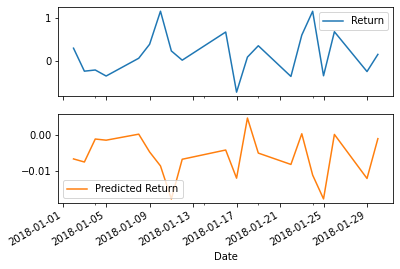

In [12]:
# Plot the first 20 predictions vs the true values
Results_y_test[:20].plot(subplots=True)

# Out-of-Sample Performance

Evaluate the model using "out-of-sample" data (X_test and y_test)

In [14]:
from sklearn.metrics import mean_squared_error
# Calculate the mean_squared_error (MSE) on actual versus predicted test "y" 
mse = mean_squared_error(
    Results_y_test["Return"],
    Results_y_test["Predicted Return"])

# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
rmse = round(np.sqrt(mse),3)
print(f"Out-of-Sample Root Mean Squared Error (RMSE): {rmse}")

Out-of-Sample Root Mean Squared Error (RMSE): 0.415


# In-Sample Performance

Evaluate the model using in-sample data (X_train and y_train)

In [15]:
# Construct a dataframe using just the "y" training data:
in_sample_results = y_train.to_frame()

# Add a column of "in-sample" predictions to that dataframe:  
in_sample_results["In-sample Predictions"] = model.predict(X_train)

# Calculate in-sample mean_squared_error (for comparison to out-of-sample)
in_sample_mse = mean_squared_error(
    in_sample_results["Return"],
    in_sample_results["In-sample Predictions"])
    
# Calculate in-sample root mean_squared_error (for comparison to out-of-sample)
in_sample_rmse = round(np.sqrt(in_sample_mse), 3)
print(f"In-sample Root Mean Squared Error (RMSE): {in_sample_rmse}")

In-sample Root Mean Squared Error (RMSE): 0.566


# Conclusions

YOUR CONCLUSIONS HERE!

## The training data seems to have a higher RMSE than the test data which appears to indicate that the model has been underfit. Therefore, the model might performs better with data that it has not analysed before and we can strenghthen the model by populating more data or variables